# 3802ICT Assignment 1

<p>Junghee Yang (Kat) <br>
Regnier Avice<br>
Yunpeng Huang (Steven)</p>

In [13]:
import numpy as np
import pandas as pd
import math

In [43]:
from matplotlib import pyplot as plt

In [101]:
df = pd.read_csv("/Users/katyang/Desktop/Uni/Year2-Trimester2/3804ICT/Assignment/listings_details.csv")

/Users/katyang/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [103]:
# Drop impractical columns 
df = df.drop(['id', 'zipcode', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'bed_type', 'amenities', 'square_feet', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'], axis=1)

In [104]:
df.head()

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,number_of_reviews,review_scores_rating
0,100%,t,f,Apartment,Private room,2,1.5,1.0,2.0,$59.00,NaN,"$1,500.00",$100.00,248,97.0
1,100%,f,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,$160.00,$543.00,"$2,000.00",$300.00,42,96.0
2,100%,f,f,Townhouse,Entire home/apt,2,1.0,1.0,1.0,$80.00,NaN,NaN,NaN,233,87.0
3,100%,f,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,$125.00,$650.00,"$2,000.00",$300.00,1,100.0
4,100%,t,t,Houseboat,Private room,2,1.0,1.0,1.0,$150.00,$810.00,"$2,500.00",$0.00,171,99.0


### Data cleaning

In [106]:
df.dtypes

host_response_rate         object
host_is_superhost          object
host_identity_verified     object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                      object
weekly_price               object
monthly_price              object
security_deposit           object
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [97]:
# host_response_rate - remove '%' and change object to int 
try: 
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
    df['host_response_rate'] = df['host_response_rate'].astype(int)
except:
    pass

In [98]:
# host_is_superhost - change object to BOOL
try: 
    df['host_is_superhost'] = df['host_is_superhost'].str.replace('f', 'FALSE')
    df['host_is_superhost'] = df['host_is_superhost'].str.replace('t', 'TRUE')
    df['host_is_superhost'] = df['host_is_superhost'].astype(bool)
except:
    pass

In [99]:
# host_identity_verified - change object to BOOL
try: 
    df['host_identity_verified'] = df['host_identity_verified'].str.replace('f', 'FALSE')
    df['host_identity_verified'] = df['host_identity_verified'].str.replace('t', 'TRUE')
    df['host_identity_verified'] = df['host_identity_verified'].astype(bool)
except:
    pass

In [105]:
# property_type - change object to string
try: 
    df['property_type'] = df['property_type'].astype(str)
except:
    pass

In [ ]:
# property_type - change object to string
try: 
    df['room_type'] = df['room_type'].astype(str)
except:
    pass

In [73]:
# Price - remove '$' and ',' and change string to float
try: 
    df['price'] = df['price'].str.replace(',', '')
    df['price'] = df['price'].str.replace('$', '')
    df['price'] = df['price'].astype(float)
except:
    pass

### Outliers in price

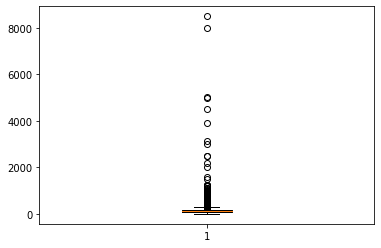

In [74]:
plt.boxplot(df['price'])
plt.show()

### Remove outliers in price

In [80]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['price']))
df = df[df.z_score < 3]

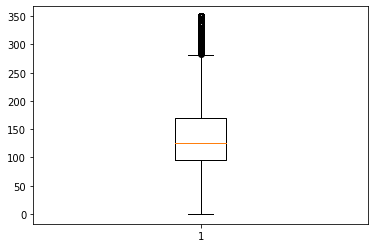

In [81]:
plt.boxplot(df['price'])
plt.show()

In [83]:
df = df['host_response_rate'],['host_is_superhost'],['host_identity_verified'],['zipcode'],['property_type'],['room_type'],['accommodates'],['bathrooms'],['bedrooms'],['beds'],['price'],['weekly_price'],['monthly_price'],['security_deposit'],['number_of_reviews'],['review_scores_rating']

In [85]:
df.head

AttributeError: 'tuple' object has no attribute 'head'